In [232]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import sklearn
#import itertools
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

In [93]:
os.listdir()

['.ipynb_checkpoints',
 'Aptus Case study Solution',
 'build',
 'dfname..xlsx',
 'dist',
 'Filtered_Output_Data.csv',
 'hosuing price.csv',
 'Housing.ipynb',
 'HR_comma_sep.csv',
 'HR_Practice.ipynb',
 'HR_Practice.spec',
 'Outlier Detection.ipynb',
 'Tax Proofs',
 'Telco-Customer-Churn.csv',
 'telecom_churn.csv',
 'text analysis',
 'Twitter Sentiment Analysis.ipynb',
 'Untitled.ipynb',
 'Untitled1.ipynb']

In [94]:
df=pd.read_csv('./HR_comma_sep.csv',index_col=None)
df.head(5)

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


### Subset selection or Slicing based on Some condition 

In [96]:
df[(df['salary']=='high') & (df['left']==1)].shape##People who have left and having high salary

(82, 10)

In [97]:
df[df['salary'].isin(['medium','low']) & (df['left']==1)].head(5)###People who have left and was having low and medium salary

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [98]:
df[df['salary'].isin(['medium','low']) & df['left']==1].shape

(3489, 10)

In [99]:
df.loc[2:5,['satisfaction_level','number_project']]

,satisfaction_level,number_project
2,0.11,7
3,0.72,5
4,0.37,2
5,0.41,2


In [100]:
df.left.loc[2500]

0

In [101]:
df.shape

(14999, 10)

In [102]:
df.isnull().any()

satisfaction_level       False
last_evaluation          False
number_project           False
average_montly_hours     False
time_spend_company       False
Work_accident            False
left                     False
promotion_last_5years    False
sales                    False
salary                   False
dtype: bool

In [103]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
satisfaction_level       14999 non-null float64
last_evaluation          14999 non-null float64
number_project           14999 non-null int64
average_montly_hours     14999 non-null int64
time_spend_company       14999 non-null int64
Work_accident            14999 non-null int64
left                     14999 non-null int64
promotion_last_5years    14999 non-null int64
sales                    14999 non-null object
salary                   14999 non-null object
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


In [104]:
df.left.value_counts()

0    11428
1     3571
Name: left, dtype: int64

In [105]:
df.groupby(['salary']).size()

salary
high      1237
low       7316
medium    6446
dtype: int64

In [269]:
df.left.value_counts()

0    11428
1     3571
Name: left, dtype: int64

# Reasons for leaving the comapny

# Multi-Variate Analysis of Categorical variables through Cross-Tab

In [106]:
pd.crosstab(df['promotion_last_5years'],df['left'],normalize='index')


left,0,1
promotion_last_5years,,
0,0.758038,0.241962
1,0.940439,0.059561


In [107]:
pd.crosstab(df['promotion_last_5years'],df['left'],normalize='index')

left,0,1
promotion_last_5years,,
0,0.758038,0.241962
1,0.940439,0.059561


#### So in both the vases we observed that,the People who have not got promotion since last 5 years are more likely to leave the company

In [108]:
df.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident', 'left',
       'promotion_last_5years', 'sales', 'salary'],
      dtype='object')

In [109]:
pd.crosstab(df['time_spend_company'],df['left'],normalize='index')

left,0,1
time_spend_company,,
2,0.983662,0.016338
3,0.753841,0.246159
4,0.651936,0.348064
5,0.434487,0.565513
6,0.708914,0.291086
7,1.000000,0.000000
8,1.000000,0.000000
10,1.000000,0.000000


###APeople having experience more than 5 years of experience are more likely to leave the organisation

In [110]:
pd.crosstab(df['salary'],df['left'],normalize='index')

left,0,1
salary,,
high,0.933711,0.066289
low,0.703116,0.296884
medium,0.795687,0.204313


#### Low and medium salary people are more likely to leave the company

# Visualization showing the count of people who left

In [111]:
categorical=['number_project','time_spend_company','Work_accident','promotion_last_5years','sales','salary'] # here I have removed left to see who is leaving cpmpany
length=len(categorical) # no of categorical and ordinal variable
print(categorical)
print(length)

['number_project', 'time_spend_company', 'Work_accident', 'promotion_last_5years', 'sales', 'salary']
6


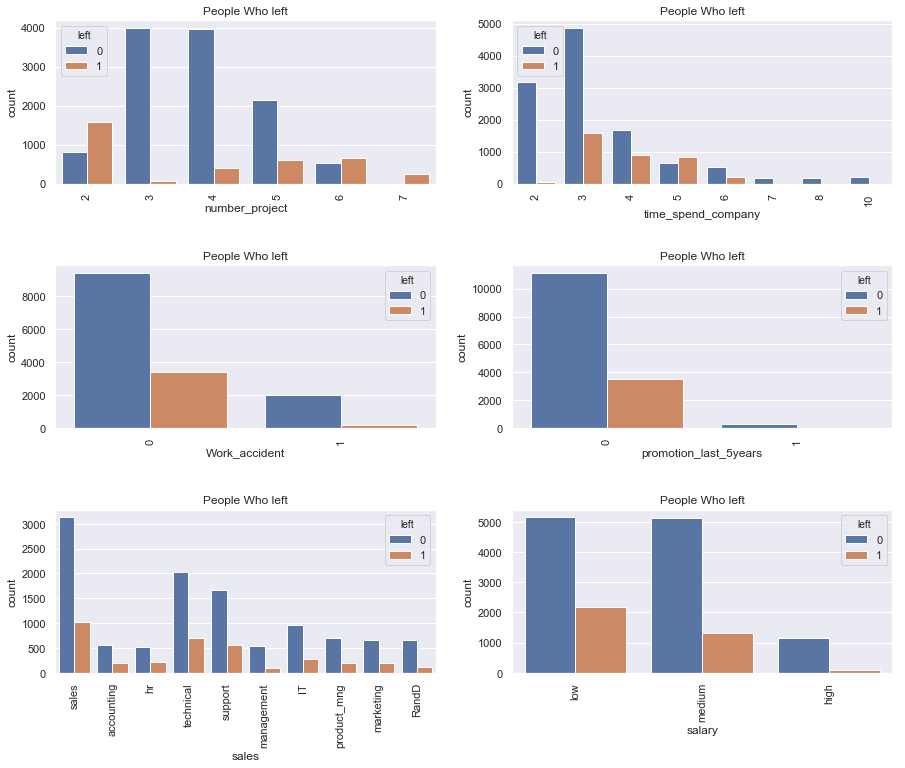

In [112]:
fig=plt.subplots(figsize=(15,12))# to define the size of figure
for index,item in enumerate(categorical):
    plt.subplot(np.ceil(length/2),2,index+1)###Craeting subplots in a mainplot.i,e 3 rows of graphs will be there in 2 columns and in 1 main graph
    plt.subplots_adjust(hspace=0.5)
    sns.countplot(x=item,data=df,hue='left')### To plot the countplot of variable with hue left
    plt.xticks(rotation=90)### to rotate the x-axis labels by 90 degree such that no labels overlap each other
    plt.title("People Who left")
    
    

number_project 0
time_spend_company 1
Work_accident 2
promotion_last_5years 3
sales 4
salary 5


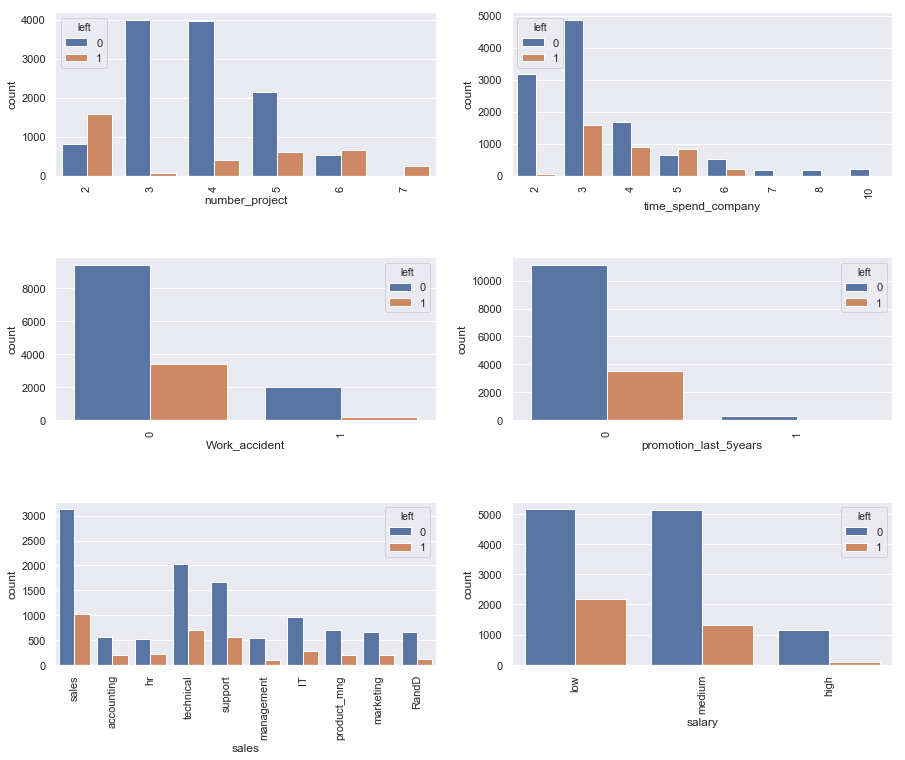

In [113]:
#####own written########
fig=plt.figure(figsize=(15,12))

for index,var in enumerate(categorical):
    print(var,index)
    plt.subplot(3,2,index+1)
    plt.subplots_adjust(hspace=0.5)
    plt.xticks(rotation=90)
    sns.countplot(x=var,data=df,hue='left')

 ### Some Group_By functions Basic 

In [114]:
left_ppl=df.groupby('salary')['left'].agg(lambda x:(x==1).sum()).reset_index()
left_ppl


,salary,left
0,high,82
1,low,2172
2,medium,1317


In [115]:
left=df.groupby('salary')['left'].apply(lambda x:(x==1).count()).reset_index()
left

,salary,left
0,high,1237
1,low,7316
2,medium,6446


In [116]:
total_ppl=df.groupby('salary')['left'].agg(lambda x:(x==1).count()).reset_index()
total_ppl

,salary,left
0,high,1237
1,low,7316
2,medium,6446


In [117]:
merge=pd.merge(left_ppl,total_ppl,on='salary')
#merge['left_y']="total"
merge

,salary,left_x,left_y
0,high,82,1237
1,low,2172,7316
2,medium,1317,6446


In [118]:
merge['Proporation']=(merge['left_x']/merge['left_y'])*100
merge

,salary,left_x,left_y,Proporation
0,high,82,1237,6.628941
1,low,2172,7316,29.688354
2,medium,1317,6446,20.431275


# Visualization showing the proportion of people who left

In [119]:
categorical=df.select_dtypes('object')


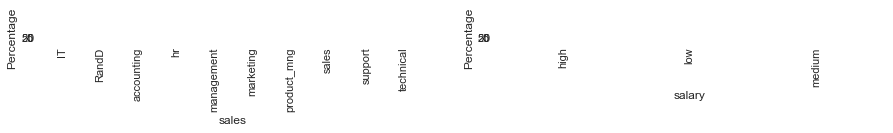

In [120]:
fig=plt.subplots(figsize=(15,12))
for index,var in enumerate(categorical):
    ppl_left1=df.groupby(var)['left'].agg(lambda x:(x==1).sum()).reset_index()
    ppl_total1=df.groupby(var)['left'].agg(lambda x:(x==1).count()).reset_index()
    merge1=pd.merge(ppl_left1,ppl_total1,on=var)
    merge1['proportion']=(merge1['left_x']/merge1['left_y'])*100
    
    plt.subplot(len(categorical)/2,2,index+1)
    plt.subplots_adjust(hspace=0.5)
    sns.barplot(x=var,y='proportion',data=merge1)
    plt.xticks(rotation=90)
    plt.ylabel('Percentage')
    
    


#### 1.Now looking at the number of projects the employees who have done 7 project they left the company and then it comes who 
#### have done 2 projects 60 % of them have left the company maybe there are fired by company.

#### 2.Then coming to time spend in company the top is 5 years followed by 4 and 6 it means the younger(2 or 3) and older 
#### ones(more than 6) are leaving less company then the adult ones(4,5,6)

#### 3.Now who got promotion in last 5 year it seems to be conflict with previous observation in that we said who got promotion in 
#### last 5 year haven't left the but here it is 5 % of them it is because of scale because who left is a very less number so it 
#### didn't come in graph

#### 4.Now coming to department in previous graphs we saw in sales department more employee left the group but if we talk in 
#### percentage then HR department is at the top followed by Accounts and technical. Management peoples are in less percentage 
#### it is because may be they are at higher positions

#### 5.In case of salary the employee who are getting a low salary are leaving more than the medium and high. Those who are getting 
#### high salary only 5 % of left the company

# Multi-variate analysis of Continuous variables 

In [121]:
df.dtypes

satisfaction_level       float64
last_evaluation          float64
number_project             int64
average_montly_hours       int64
time_spend_company         int64
Work_accident              int64
left                       int64
promotion_last_5years      int64
sales                     object
salary                    object
dtype: object

In [122]:
continuous=['satisfaction_level','last_evaluation','average_montly_hours']

c:\users\pramit aptus\appdata\local\programs\python\python36\lib\site-packages\seaborn\axisgrid.py:2065: UserWarning: The `size` parameter has been renamed to `height`; pleaes update your code.
  warnings.warn(msg, UserWarning)


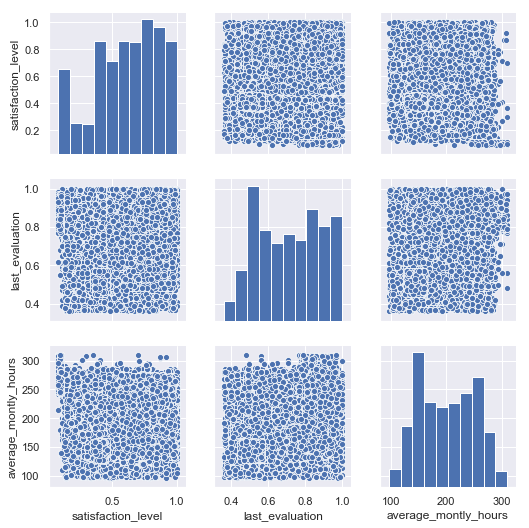

In [123]:
sns.set()
sns.pairplot(data=df[continuous],size=2.5)
plt.show()

# Feature Engineering:

### By Co-relation matrix:

In [124]:
corr=df.corr()

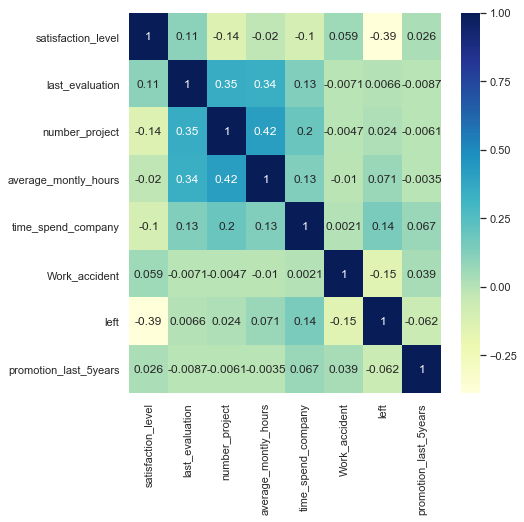

In [125]:
fig=plt.figure(figsize=(7,7))
sns.heatmap(corr,annot=True,cmap='YlGnBu')

#### Here no variables are so much correlated so that we can say that all variables are uncorrelated
#### so no need to remove any features lets get important features by using Randomforestclassifier

### By Random Forest

In [135]:
from sklearn.preprocessing import LabelEncoder

In [136]:
le=LabelEncoder()

In [137]:
df['salary']=le.fit_transform(df['salary'])
df['sales']=le.fit_transform(df['sales'])

In [138]:
df.head(5)

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.38,0.53,2,157,3,0,1,0,7,1
1,0.80,0.86,5,262,6,0,1,0,7,2
2,0.11,0.88,7,272,4,0,1,0,7,2
3,0.72,0.87,5,223,5,0,1,0,7,1
4,0.37,0.52,2,159,3,0,1,0,7,1


In [139]:
from sklearn.ensemble import RandomForestClassifier

In [140]:
rf=RandomForestClassifier(n_estimators=50)

In [141]:
independent=df.loc[:,df.columns!='left']
independent.head(5)

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,sales,salary
0,0.38,0.53,2,157,3,0,0,7,1
1,0.80,0.86,5,262,6,0,0,7,2
2,0.11,0.88,7,272,4,0,0,7,2
3,0.72,0.87,5,223,5,0,0,7,1
4,0.37,0.52,2,159,3,0,0,7,1


In [142]:
dependent=df.loc[:,['left']]
dependent.head(5)

,left
0,1
1,1
2,1
3,1
4,1


In [233]:
rf.fit(independent,dependent)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=50, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [144]:
rf.feature_importances_

array([0.33430911, 0.11511465, 0.16917043, 0.16442221, 0.19033774,
       0.00484279, 0.00117669, 0.01264248, 0.00798389])

In [145]:
independent.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident',
       'promotion_last_5years', 'sales', 'salary'],
      dtype='object')

In [146]:
impfeature=pd.DataFrame(data=rf.feature_importances_,index=independent.columns,columns=['Weight'])
impfeature.sort_values(by='Weight',ascending=False)

,Weight
satisfaction_level,0.334309
time_spend_company,0.190338
number_project,0.169170
average_montly_hours,0.164422
last_evaluation,0.115115
sales,0.012642
salary,0.007984
Work_accident,0.004843
promotion_last_5years,0.001177


# Model Building

In [239]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.metrics import cohen_kappa_score,f1_score,recall_score,precision_score
from pprint import pprint


In [298]:
X=df.loc[:,df.columns!='left']
y=df.loc[:,['left']]

In [304]:
print(y_train.left.value_counts())

0    7659
1    2390
Name: left, dtype: int64


In [344]:
model_data= list()
def model_building(model_name,model,X,y):
    global model_data
    data_list = list()
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
    model.fit(X_train,y_train)
    pred=model.predict(X_test)
    
    ###Metrics
    acc=accuracy_score(y_test,pred)
    confusion = pd.DataFrame(confusion_matrix(y_test,pred),
                columns=["Predicted Class " + str(class_name) for class_name in [0,1]],
                index = ["Actual Class " + str(class_name) for class_name in [0,1]])
    report=classification_report(y_test,pred)
    recall=precision_score(y_test,pred)
    precision =precision_score(y_test,pred)
    F1Score=f1_score(y_test,pred)
    Kappa=cohen_kappa_score(y_test,pred)
    
    #Appending to a list
    model_data.append(tuple([model_name,acc,recall,precision,F1Score,Kappa]))
    print("Confusion Matrix for {} \n {}".format(model_name,confusion))
    #print("Classification report for {} \n {}".format(model_name,report)) 
    return
    
    

In [345]:
model_names=["RandomForestClassifier","Gaussian Naive Bays","KNN","Logistic_Regression","DecisionTreeClassifier"]
model_list=[RandomForestClassifier(n_estimators=100),GaussianNB(),KNeighborsClassifier(n_neighbors=7),LogisticRegression(),DecisionTreeClassifier()]
model_accuracy=[]
for index,model in enumerate(model_list):
    model_building(model_names[index],model,X,y)
#     model_accuracy.append(Accuracy)
# model_accuracy   

Confusion Matrix for RandomForestClassifier 
                 Predicted Class 0  Predicted Class 1
Actual Class 0               3762                  7
Actual Class 1                 47               1134
Confusion Matrix for Gaussian Naive Bays 
                 Predicted Class 0  Predicted Class 1
Actual Class 0               3109                660
Actual Class 1                334                847
Confusion Matrix for KNN 
                 Predicted Class 0  Predicted Class 1
Actual Class 0               3549                220
Actual Class 1                120               1061
Confusion Matrix for Logistic_Regression 
                 Predicted Class 0  Predicted Class 1
Actual Class 0               3473                296
Actual Class 1                899                282
Confusion Matrix for DecisionTreeClassifier 
                 Predicted Class 0  Predicted Class 1
Actual Class 0               3687                 82
Actual Class 1                 47               1134


In [346]:
labels = ['ModelName','Accuracy',"Recall","Precision","F1Scrore","Kappa"]

In [347]:
model_details=pd.DataFrame.from_records(model_data,columns=labels)
model_details.sort_values(by='Accuracy',ascending=False)

,ModelName,Accuracy,Recall,Precision,F1Scrore,Kappa
0,RandomForestClassifier,0.989091,0.993865,0.993865,0.976744,0.969621
4,DecisionTreeClassifier,0.973939,0.932566,0.932566,0.946183,0.928994
2,KNN,0.931313,0.828259,0.828259,0.861901,0.816290
1,Gaussian Naive Bays,0.799192,0.562044,0.562044,0.630208,0.495150
3,Logistic_Regression,0.758586,0.487889,0.487889,0.320637,0.194307


### Oversampling Using SMOTE

In [289]:
from imblearn.over_sampling import SMOTE

In [331]:
y.left.value_counts()

0    11428
1     3571
Name: left, dtype: int64

In [340]:
#resampling need to be done on training dataset only
sm = SMOTE(random_state=12, ratio = 0.7)
X_res, y_res = sm.fit_sample(X, y)

In [342]:
np.bincount(y_res),X_res.shape

(array([11428,  7999], dtype=int64), (19427, 9))

In [353]:
model_data_res= list()
def model_building(model_name,model,X_res,y_res):
    global model_data
    data_list = list()
    
    X_train_res, X_test_res, y_train_res, y_test_res = train_test_split(X_res, y_res, test_size=0.33, random_state=42)
    model.fit(X_train_res,y_train_res)
    pred=model.predict(X_test_res)
    
    ###Metrics
    acc=accuracy_score(y_test_res,pred)
    confusion = pd.DataFrame(confusion_matrix(y_test_res,pred),
                columns=["Predicted Class " + str(class_name) for class_name in [0,1]],
                index = ["Actual Class " + str(class_name) for class_name in [0,1]])
    report=classification_report(y_test_res,pred)
    recall=precision_score(y_test_res,pred)
    precision =precision_score(y_test_res,pred)
    F1Score=f1_score(y_test_res,pred)
    Kappa=cohen_kappa_score(y_test_res,pred)
    
    #Appending to a list
    model_data_res.append(tuple([model_name,acc,recall,precision,F1Score,Kappa]))
    print("Confusion Matrix for {} \n {}".format(model_name,confusion))
    #print("Classification report for {} \n {}".format(model_name,report)) 
    return
    
    

In [354]:
model_names=["RandomForestClassifier","Gaussian Naive Bays","KNN","Logistic_Regression","DecisionTreeClassifier"]
model_list=[RandomForestClassifier(n_estimators=100),GaussianNB(),KNeighborsClassifier(n_neighbors=7),LogisticRegression(),DecisionTreeClassifier()]
model_accuracy=[]
for index,model in enumerate(model_list):
    model_building(model_names[index],model,X_res,y_res)

Confusion Matrix for RandomForestClassifier 
                 Predicted Class 0  Predicted Class 1
Actual Class 0               3788                 14
Actual Class 1                 59               2550
Confusion Matrix for Gaussian Naive Bays 
                 Predicted Class 0  Predicted Class 1
Actual Class 0               2325               1477
Actual Class 1                258               2351
Confusion Matrix for KNN 
                 Predicted Class 0  Predicted Class 1
Actual Class 0               3438                364
Actual Class 1                 82               2527
Confusion Matrix for Logistic_Regression 
                 Predicted Class 0  Predicted Class 1
Actual Class 0               3123                679
Actual Class 1                795               1814
Confusion Matrix for DecisionTreeClassifier 
                 Predicted Class 0  Predicted Class 1
Actual Class 0               3709                 93
Actual Class 1                 48               2561


In [355]:
labels = ['ModelName','Accuracy',"Recall","Precision","F1Scrore","Kappa"]

In [356]:
model_details=pd.DataFrame.from_records(model_data_res,columns=labels)
model_details.sort_values(by='Accuracy',ascending=False)

,ModelName,Accuracy,Recall,Precision,F1Scrore,Kappa
0,RandomForestClassifier,0.988613,0.994540,0.994540,0.985888,0.976346
4,DecisionTreeClassifier,0.978007,0.964959,0.964959,0.973209,0.954558
2,KNN,0.930432,0.874092,0.874092,0.918909,0.858277
3,Logistic_Regression,0.770083,0.727637,0.727637,0.711094,0.520325
1,Gaussian Naive Bays,0.729371,0.614159,0.614159,0.730465,0.477620
